In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
l = ["age", "type_employer", "fnlwgt", "education", "education_num","marital", "occupation", "relationship", "race","sex", "capital_gain", "capital_loss", "hr_per_week","country", "income"]
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, names=l)

In [33]:
data.sample(15)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
15053,32,Private,309513,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
29357,50,Private,176227,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,?,>50K
10342,61,?,160625,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,4386,0,15,United-States,>50K
27562,44,Private,198270,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,43,United-States,<=50K
11002,25,Private,197036,10th,6,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
13930,34,Private,157747,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K
9724,26,Private,176520,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,53,United-States,<=50K
19758,27,Self-emp-not-inc,107846,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,30,United-States,<=50K
29927,42,Private,223548,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,30,Mexico,<=50K
16254,46,Private,224202,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [31]:
data['sex'].value_counts() 

Male      21790
Female    10771
Name: sex, dtype: int64

In [13]:
data.groupby('sex')['age'].mean()['Male']

39.43354749885268

In [15]:
data['country'].value_counts(normalize=True)['United-States']*100

89.5857006848684

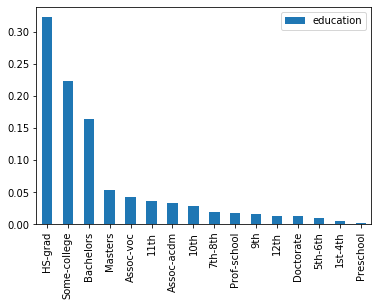

In [16]:
pd.DataFrame(data['education'].value_counts(normalize=True)).plot.bar()

In [20]:
data[data['marital'] == 'Divorced']['fnlwgt'].mean()

185802.79045689848

In [21]:
data[data['marital'] == 'Divorced']['fnlwgt'].std()

105646.78945933603

In [27]:
data.groupby('income')['education'].value_counts()['>50K'] #No

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [29]:
data.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

In [54]:
data.groupby('occupation')['country'].value_counts()['Farming-fishing']

country
United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Canada             2
Cuba               2
El-Salvador        2
Italy              2
Vietnam            2
Cambodia           1
England            1
France             1
Germany            1
Hong               1
Ireland            1
Japan              1
Poland             1
Portugal           1
Yugoslavia         1
Name: country, dtype: int64

In [59]:
data.groupby('education')['sex'].value_counts()['Bachelors']['Male']/data.groupby('education')['sex'].value_counts()['Masters']['Male']

3.14743049705139

In [60]:
data.groupby('education')['sex'].value_counts()['Bachelors']['Female']/data.groupby('education')['sex'].value_counts()['Masters']['Female']

3.0205223880597014

In [ ]:
# The first is higher

In [62]:
data['hr_per_week'].max()

99

In [67]:
data[data['hr_per_week'] == 99].count()['age']

85

In [68]:
data[data['hr_per_week'] == 99]['income']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: income, Length: 85, dtype: object